libraries that we need

In [2]:
import os
import zipfile
import pandas as pd
from collections import defaultdict
import re
import matplotlib.pyplot as plt

<h1>
extracting data from a zip file
</h1>

In [ ]:
rar_file_path = r"F:\daneshkar\project1\202405.zip" 
output_folder = 'extracted_rar_files'  

if not os.path.exists(output_folder):
    os.makedirs(output_folder)


with zipfile.ZipFile(rar_file_path, 'r') as rf:
    rf.extractall(output_folder)


for filename in os.listdir(output_folder):
    file_path = os.path.join(output_folder, filename)
    if filename.endswith('.zip'):
        print(f'extracting file {filename} ')
        with zipfile.ZipFile(file_path, 'r') as rf_inner:
            rf_inner.extractall(os.path.join(output_folder, filename[:-4])) 

read parquet files and create a dataframe and save them in csv files

In [ ]:
import os
import pandas as pd
import re
from collections import defaultdict

def read_and_group_parquet_files(base_folder, start_date, end_date, folders_in_row):
    data_frames = defaultdict(list)
    group_names = [
        'home_team_score',
        'home_team',
        'away_team',
        'away_team_score',
        'event',
        'round',
        'season',
        'time',
        'tournament',
        'venue',
        'odds',
        'pbp',
        'statistics',
        'power',
        'votes'
    ]

    # Regular expressions for away_team and away_team_score
    away_team_pattern = re.compile(r'^away_team_')
    away_team_score_pattern = re.compile(r'^away_team_score_')

    for date in range(start_date, end_date + 1):
        for folder in folders_in_row:
            date_folder = os.path.join(base_folder, str(date), 'data', 'raw', folder)
            print(f'Reading folder: {date_folder}')  # Monitor the current folder
            if os.path.isdir(date_folder):
                for file_name in os.listdir(date_folder):
                    if file_name.endswith('.parquet'):
                        matched_group = None
                        # Check each group name if the filename starts with it
                        if away_team_score_pattern.match(file_name):
                            matched_group = 'away_team_score'
                        elif away_team_pattern.match(file_name):
                            matched_group = 'away_team'
                        else:
                            # Simple string matching for other group names
                            for group_name in group_names:
                                if file_name.startswith(group_name + '_'):
                                    matched_group = group_name
                                    break

                        if matched_group:
                            file_path = os.path.join(date_folder, file_name)
                            df = pd.read_parquet(file_path)
                            data_frames[matched_group].append(df)

    # Concatenate DataFrames in each group and save to CSV
    grouped_data_frames = {}
    for group, dfs in data_frames.items():
        if dfs:  # Check if the list of DataFrames is not empty
            concatenated_df = pd.concat(dfs, ignore_index=True)
            grouped_data_frames[group] = concatenated_df
            # Save DataFrame to CSV
            csv_file_path = os.path.join(base_folder, f'{group}.csv')
            concatenated_df.to_csv(csv_file_path, index=False)
            print(f'Saved {group} DataFrame to {csv_file_path}')

    return grouped_data_frames

# Example usage
base_folder = r'F:\daneshkar\project1\extracted_rar_files'
start_date = 20240501
end_date = 20240531
folders_in_row = (
    'raw_match_parquet',
    'raw_odds_parquet',
    'raw_point_by_point_parquet',
    'raw_statistics_parquet',
    'raw_tennis_power_parquet',
    'raw_votes_parquet'
)

grouped_data_frames = read_and_group_parquet_files(base_folder, start_date, end_date, folders_in_row)

# Display the groups and their DataFrames
for group_name, df in grouped_data_frames.items():
    print(f'Group: {group_name}')
    # print(df.head())  # Print the first few rows of each DataFrame


read csv files

In [3]:
# Define the directory and group names
base_folder = r'e:\extracted_rar_files'
group_names = [
    'home_team_score',
    'home_team',
    'away_team',
    'away_team_score',
    'event',
    'round',
    'season',
    'time',
    'tournament',
    'venue',
    'odds',
    'pbp',
    'statistics',
    'power',
    'votes'
]

# Initialize a dictionary to store the DataFrames
grouped_data_frames = {}

# Read each CSV file into a DataFrame and store it in the dictionary
for group_name in group_names:
    csv_file_path = os.path.join(base_folder, f'{group_name}.csv')
    if os.path.exists(csv_file_path):
        df = pd.read_csv(csv_file_path)
        grouped_data_frames[group_name] = df
        print(f'Successfully read {group_name}.csv')
    else:
        print(f'File {group_name}.csv not found')

# Display the DataFrames (or perform further operations)
for group_name, df in grouped_data_frames.items():
    print(f'Group: {group_name}')
    # print(df.head())  # Print the first few rows of each DataFrame


Successfully read home_team_score.csv
Successfully read home_team.csv
Successfully read away_team.csv
Successfully read away_team_score.csv
Successfully read event.csv
Successfully read round.csv
Successfully read season.csv
Successfully read time.csv
Successfully read tournament.csv
Successfully read venue.csv
Successfully read odds.csv
Successfully read pbp.csv
Successfully read statistics.csv
Successfully read power.csv
Successfully read votes.csv
Group: home_team_score
Group: home_team
Group: away_team
Group: away_team_score
Group: event
Group: round
Group: season
Group: time
Group: tournament
Group: venue
Group: odds
Group: pbp
Group: statistics
Group: power
Group: votes


check the shape of dataframes

In [27]:
# Display the shape of each DataFrame
for group_name, df in grouped_data_frames.items():
    print(f'Group: {group_name}, Shape: {df.shape}')

Group: home_team_score, Shape: (19676, 15)
Group: home_team, Shape: (14090, 19)
Group: away_team, Shape: (12955, 19)
Group: away_team_score, Shape: (19676, 14)
Group: event, Shape: (19676, 10)
Group: round, Shape: (12087, 5)
Group: season, Shape: (19676, 4)
Group: time, Shape: (19676, 8)
Group: tournament, Shape: (19676, 16)
Group: venue, Shape: (19589, 5)
Group: odds, Shape: (33740, 11)
Group: pbp, Shape: (1467013, 14)
Group: statistics, Shape: (794368, 13)
Group: power, Shape: (269694, 5)
Group: votes, Shape: (19677, 3)


1. How many tennis players are included in the dataset?

In [4]:
home_team = grouped_data_frames['home_team']
away_team = grouped_data_frames['away_team']

# Combine home and away team info into one DataFrame
players_info = pd.concat([
    home_team[['player_id', 'full_name']],
    away_team[['player_id', 'full_name']]
]).drop_duplicates().reset_index(drop=True)
number_of_tennis_players=len(players_info)

print(f'The number of unique tennis players in the dataset is: {number_of_tennis_players}')

The number of unique tennis players in the dataset is: 2353


<h1>
2.What is the average height of the players?
</h1>

In [28]:
df_cleaned_away_team = grouped_data_frames['away_team'].dropna(subset=['gender'])
df_cleaned_home_team = grouped_data_frames['home_team'].dropna(subset=['gender'])

#We remove the rows that have missing values in the gender column.

df_concat_gender=pd.concat([df_cleaned_home_team[['player_id','full_name','gender','height']],df_cleaned_away_team[['player_id','full_name','gender','height']]]).drop_duplicates().reset_index(drop=True)

mean_height_male_with_null = df_concat_gender[df_concat_gender['gender'] == 'M']['height'].mean()
mean_height_female_with_null = df_concat_gender[df_concat_gender['gender'] == 'F']['height'].mean()

num_missing = df_concat_gender['gender'].isna().sum()

def fill_height(row):
    if pd.isna(row['height']):
        if row['gender'] == 'M':
            return mean_height_male_with_null
        elif row['gender'] == 'F':
            return mean_height_female_with_null
    return row['height']


df_concat_gender['height'] = df_concat_gender.apply(fill_height, axis=1)

mean_height_male = df_concat_gender[df_concat_gender['gender'] == 'M']['height'].mean()
mean_height_female = df_concat_gender[df_concat_gender['gender'] == 'F']['height'].mean()
mean_height_players=df_concat_gender['height'].mean()


print(f'The average height of female players is {mean_height_female} ')
print(f'The average height of male players is {mean_height_male}')
print(f'The average height of players is {mean_height_players}')

The average height of female players is 1.7321576763485476 
The average height of male players is 1.8423621227887617
The average height of players is 1.7891325324733314


3.Which player has the highest number of wins?

In [5]:
dffi=grouped_data_frames['pbp']
last_row_per_id = dffi.groupby('match_id').last().reset_index()
def determine_winner(row):
    home_has_A = 'A' in str(row['home_point'])
    away_has_A = 'A' in str(row['away_point'])

    if home_has_A and not away_has_A:
        return 0  
    elif away_has_A and not home_has_A:
        return 1  
    elif '40' in [row['home_point'], row['away_point']]:
        return 0 if row['home_point'] == '40' else 1  
    else:
        return None


last_row_per_id['Winner'] = last_row_per_id.apply(determine_winner, axis=1)
df_home_new=grouped_data_frames['home_team']
df_home_new['h/a']=0
df_away_new=grouped_data_frames['away_team']
df_away_new['h/a']=1
df_home_away=pd.concat([df_home_new,df_away_new])
df_merge_team_pbp=pd.merge(df_home_away,last_row_per_id[['Winner','match_id']] ,on='match_id',how='inner')
df_merge_team_pbp=df_merge_team_pbp[['match_id','name', 'gender','current_rank','h/a','Winner']].sort_values(by='match_id')


wins_per_player = df_merge_team_pbp.groupby(['name','gender'])['Winner'].sum().reset_index(name='wins')
wins_per_player=wins_per_player.sort_values(by='wins',ascending=False)
print(f'Player with the highest number of wins:{wins_per_player.iloc[0,0]} with {wins_per_player.iloc[0,2]} wins')

Player with the highest number of wins:Darderi L. with 27 wins


<h1>
4.What is the longest match recorded in terms of duration?
</h1>

In [6]:
df_time=grouped_data_frames['time']
df_time
df_time[df_time['current_period_start_timestamp'].isna()]
df_time['datetime'] = pd.to_datetime(df_time['current_period_start_timestamp'], unit='s')
columns_to_check = df_time.columns[1:6]
df_time_filtered = df_time.dropna(subset=columns_to_check, how='all')

match_recorded_column_data = df_time.iloc[:, 1:6].sum(axis=1)
#df_time.insert(loc=6, column='Match recorded', value=match_recorded_column_data)



condition = match_recorded_column_data <= 39600
#The longest tennis set lasted 11 hours, so we don't consider data beyond this timeframe.
if condition.any():
   
    max_row = df_time.loc[condition].iloc[:, 0:5].sum(axis=1).idxmax()
    df_time = df_time.drop(columns=df_time.columns[1:6])
    result_row = df_time.loc[max_row]

result_row  

match_id                                     12381286
current_period_start_timestamp           1717093795.0
datetime                          2024-05-30 18:29:55
Name: 19304, dtype: object

5.How many sets are typically played in a tennis match?

In [7]:
home_team_score_df = grouped_data_frames['home_team_score']
# Select columns period_1 to period_5
period_columns = ['period_1', 'period_2', 'period_3', 'period_4', 'period_5']

# Count non-null values across rows (axis=1)
home_team_score_df['filled_columns_count'] = home_team_score_df[period_columns].count(axis=1)

# Find the mode of filled_sets_count
mode_sets_count = home_team_score_df['filled_columns_count'].mode().values[0]

print(f"Typically, {mode_sets_count} sets are played in a tennis match.")

Typically, 2 sets are played in a tennis match.


<h1>
6.Which country has produced the most successful tennis players?
</h1>

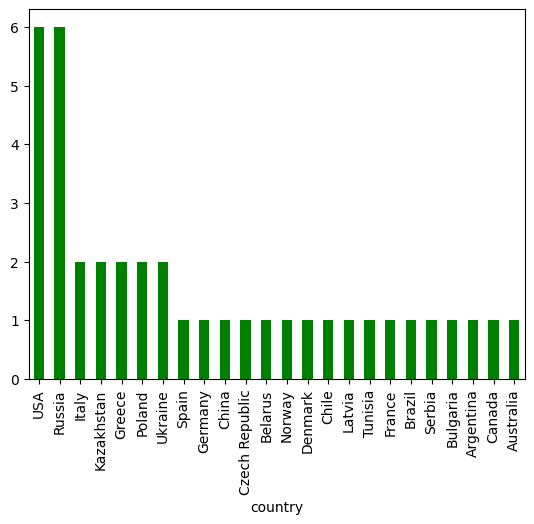

USA , Russia


In [8]:
df_all_rank=pd.concat([grouped_data_frames['home_team'],grouped_data_frames['away_team']])
df_rank = df_all_rank[(df_all_rank['current_rank'] <= 20) ]
df_rank_w=df_rank.drop(columns=['match_id','user_count','current_prize','total_prize'])
df_rank_duplicates=df_rank_w.drop_duplicates()
sorted_df = df_rank_duplicates.sort_values(by='current_rank', ascending=True)

df_unique_rank =  sorted_df.groupby('name').first().reset_index()

value_counts=df_unique_rank['country'].value_counts()
value_counts.plot(kind='bar',color='green')
plt.yticks(range(int(value_counts.max()) + 1))
plt.show()
max_index = value_counts.idxmax()
countries_with_max_value = value_counts[value_counts == value_counts[max_index]].index.tolist()

print(f"{', '.join(map(str, countries_with_max_value[:-1]))} , {countries_with_max_value[-1]}")

7.What is the average number of aces per match?

first we check the symmetry of data by the histogram of data to chose between mean and median.

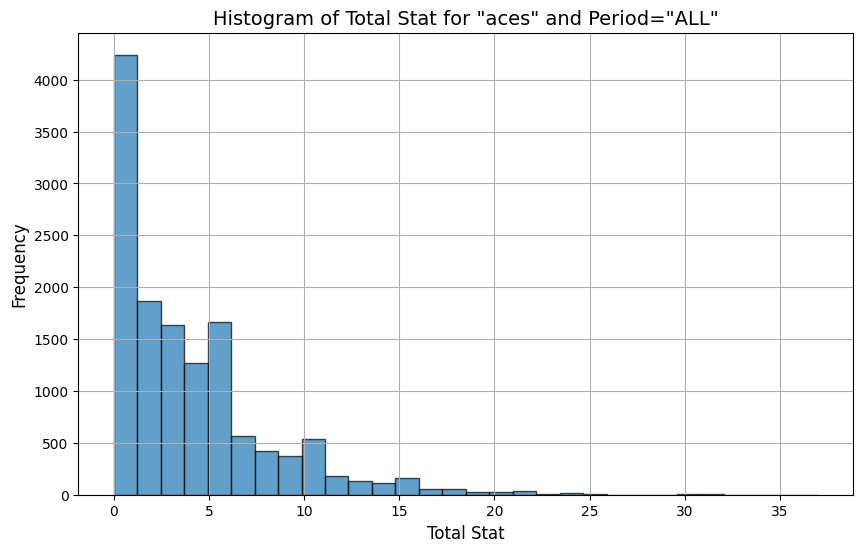

Mean of total_stat: 4.05
Median of total_stat: 3.00


In [9]:

statistics_df = grouped_data_frames['statistics']

# Filter statistics dataframe for rows where statistic_name is 'aces' and period is 'ALL'
aces_df = statistics_df[(statistics_df['statistic_name'] == 'aces') & (statistics_df['period'] == 'ALL')].copy()

# Convert 'home_stat' and 'away_stat' to numeric if they are not already
aces_df.loc[:, 'home_stat'] = pd.to_numeric(aces_df['home_stat'], errors='coerce')
aces_df.loc[:, 'away_stat'] = pd.to_numeric(aces_df['away_stat'], errors='coerce')

# Calculate the total_stat as the sum of home_stat and away_stat
aces_df['total_stat'] = aces_df['home_stat'] + aces_df['away_stat']

# Plot histogram to check distribution
plt.figure(figsize=(10, 6))
plt.hist(aces_df['total_stat'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Total Stat for "aces" and Period="ALL"', fontsize=14)
plt.xlabel('Total Stat', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Calculate mean and median
mean_total_stat = aces_df['total_stat'].mean()
median_total_stat = aces_df['total_stat'].median()

# Print mean and median
print(f"Mean of total_stat: {mean_total_stat:.2f}")
print(f"Median of total_stat: {median_total_stat:.2f}")


boxplot can help identify skewness and outliers

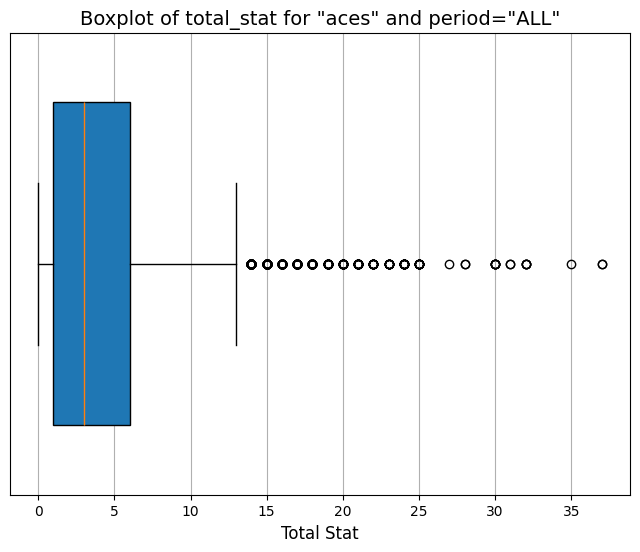

In [20]:
plt.figure(figsize=(8, 6))
plt.boxplot(aces_df['total_stat'], vert=False, patch_artist=True, widths=0.7)
plt.title('Boxplot of total_stat for "aces" and period="ALL"', fontsize=14)
plt.xlabel('Total Stat', fontsize=12)
plt.yticks([], [])
plt.grid(True)
plt.show()

calculate the average number of aces per match

In [10]:
# Calculate the median of total_stat
median_total_stat = aces_df['total_stat'].median()

# Print the mean of total_stat
print(f"the average number of aces per match is: {median_total_stat:.2f}")


the average number of aces per match is: 3.00


the matches that have more that 13 ace

In [11]:
aces_df[['match_id','total_stat']].loc[aces_df['total_stat']>13].count()

match_id      530
total_stat    530
dtype: int64

<h1>
8.Is there a difference in the number of double faults based on gender?
</h1>

In [12]:
statistics_df = grouped_data_frames['statistics']
home1_team=grouped_data_frames['home_team']

# Filter statistics dataframe for rows where statistic_name is 'double_faults' and period is 'ALL'
doubles_faults_df = statistics_df[(statistics_df['statistic_name'] == 'double_faults') & (statistics_df['period'] == 'ALL')].copy()

# Convert 'home_stat' and 'away_stat' to numeric if they are not already
doubles_faults_df.loc[:, 'home_stat'] = pd.to_numeric(doubles_faults_df['home_stat'], errors='coerce')
doubles_faults_df.loc[:, 'away_stat'] = pd.to_numeric(doubles_faults_df['away_stat'], errors='coerce')

# Calculate the total_stat as the sum of home_stat and away_stat
doubles_faults_df['total_stat'] = doubles_faults_df['home_stat'] + doubles_faults_df['away_stat']
# players gender
player_gender=home1_team[['match_id','gender']]
doubles_faults=doubles_faults_df.merge(player_gender[['match_id', 'gender']], left_on='match_id', right_on='match_id', how='left', suffixes=('', '_home'))
doubles_faults_women=doubles_faults[doubles_faults['gender']=='F']
doubles_faults_men=doubles_faults[doubles_faults['gender']=='M']

doubles_faults_men=doubles_faults_men['total_stat'].mean()
doubles_faults_women=doubles_faults_women['total_stat'].mean()

print(f'The avrage doubles faults of men is {doubles_faults_men}')
print(f'the avrage doubles faults of women is {doubles_faults_women}')

The avrage doubles faults of men is 5.503915246430217
the avrage doubles faults of women is 7.221408589764686


9.Which player has won the most tournaments in a single month?

In [218]:

statistics = grouped_data_frames['statistics']
home_team = grouped_data_frames['home_team']
away_team = grouped_data_frames['away_team']
tournament = grouped_data_frames['tournament']

# Filter statistics DataFrame for points totals
filtered_statistics = statistics[
    (statistics['statistic_category_name'] == 'points') &
    (statistics['statistic_name'] == 'total')
][['match_id', 'home_stat', 'away_stat']]

# Determine the winner based on home_stat and away_stat
def determine_winner(row):
    if row['home_stat'] > row['away_stat']:
        return "1"
    elif row['away_stat'] > row['home_stat']:
        return "2"

# Apply the function to determine the winner for each match
filtered_statistics['winner'] = filtered_statistics.apply(determine_winner, axis=1)

# Merge with home_team and away_team DataFrames to get player IDs
merged_teams = pd.merge(home_team[['match_id', 'player_id', 'full_name']],
                        away_team[['match_id', 'player_id', 'full_name']],
                        on='match_id', suffixes=('_home', '_away')).drop_duplicates()

# Merge filtered_statistics with merged_teams to get winner player IDs
win = pd.merge(filtered_statistics[['match_id', 'winner']],
               merged_teams[['match_id', 'player_id_home','full_name_home', 'player_id_away','full_name_away']],
               on='match_id')

# Initialize a new column 'winning_player_id' in win DataFrame
win['winning_player_id'] = None

# Loop through each row to assign winning_player_id based on the winner column
for index, row in win.iterrows():
    if row['winner'] == "1":
        win.at[index, 'winning_player_id'] = row['player_id_home']
        win.at[index, 'winning_player_name'] = row['full_name_home']
    elif row['winner'] == "2":
        win.at[index, 'winning_player_id'] = row['player_id_away']
        win.at[index, 'winning_player_name'] = row['full_name_away']

win_tournoment =pd.merge(win[['match_id','winning_player_id','winning_player_name']],
                         tournament[['match_id','tournament_id']],
                         on='match_id').drop_duplicates()



# Group by tournament_id and winning_player_id, and count the number of wins
player_wins_per_tournament = win_tournoment.groupby(['tournament_id', 'winning_player_id', 'winning_player_name']).size().reset_index(name='wins')

# Group by winning_player_id and winning_player_name, and count unique tournaments won
player_tournaments_won = player_wins_per_tournament.groupby(['winning_player_id', 'winning_player_name'])['tournament_id'].nunique().reset_index(name='tournaments_won')

# Find the player with the maximum tournaments won
max_tournaments_player = player_tournaments_won.loc[player_tournaments_won['tournaments_won'].idxmax()]

# Display the player with the maximum tournaments won
print(f"The player who won the most tournaments is {max_tournaments_player['winning_player_name']} "
      f"with {max_tournaments_player['tournaments_won']} tournaments.")


The player who won the most tournaments is Kuramochi, Miho with 7 tournaments.


In [219]:
# Sum the number of wins per player per tournament
player_wins_per_tournament_sum = player_wins_per_tournament.groupby(['winning_player_id', 'winning_player_name'])['wins'].sum().reset_index(name='total_wins')

# Find the player with the maximum total wins
max_wins_player = player_wins_per_tournament_sum.loc[player_wins_per_tournament_sum['total_wins'].idxmax()]

# Display the player with the maximum total wins
print(f"The player who won the most tournaments (by sum of wins) is {max_wins_player['winning_player_name']} "
      f"with {max_wins_player['total_wins']} total wins.")


The player who won the most tournaments (by sum of wins) is Uchijima, Moyuka with 17 total wins.


<h1>
10.Is there a correlation between a player's height and their ranking?
</h1>

In [13]:
df_concat_team=pd.concat([grouped_data_frames['away_team'],grouped_data_frames['home_team']])
df_concat_team=df_concat_team.drop(columns=['match_id','user_count','current_prize','total_prize'])
df_concat_team=df_concat_team.drop_duplicates()
df_concat_team=df_concat_team.groupby('name').first().reset_index()
correlation = df_concat_team['height'].corr(df_concat_team['current_rank'])
if correlation >= 0.7 or correlation <= -0.7:
    correlation_category = "Strong correlation"
elif 0.4 <= correlation < 0.7 or -0.4 >= correlation > -0.7:
    correlation_category = "Moderate correlation"
elif 0.1 <= correlation < 0.4 or -0.1 >= correlation > -0.4:
    correlation_category = "Weak correlation"
else:
    correlation_category = "Very weak or no correlation"


print(f"The correlation between Column1 and Column2 is: {correlation}")
print(f"This correlation is categorized as: {correlation_category}")

The correlation between Column1 and Column2 is: 0.08609144624811947
This correlation is categorized as: Very weak or no correlation


11.What is the average duration of matches?

In [14]:

time_df = grouped_data_frames['time']

# Ensure all period columns are treated as numeric, and NaNs are handled
time_df = time_df[['match_id', 'period_1', 'period_2', 'period_3', 'period_4', 'period_5']].apply(pd.to_numeric, errors='coerce')

# Calculate the total duration for each match by summing the periods
time_df['total_duration'] = time_df[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].sum(axis=1, skipna=True)

# Calculate the average duration
average_duration = time_df['total_duration'].mean()

print(f"The average duration of matches is {average_duration/60} minutes.")



The average duration of matches is 84.11333011452191 minutes.


<h1>
12-What is the average number of games per set in men's matches compared to women's matches?
</h1>

In [186]:
statistics = grouped_data_frames['statistics']
home_team = grouped_data_frames['home_team']
away_team = grouped_data_frames['away_team']

# Filter statistics DataFrame for points totals
filtered1_statistics = statistics[
    (statistics['statistic_category_name'] == 'games') &
    (statistics['statistic_name'] == 'total_won')
][['match_id', 'home_stat', 'away_stat']]

# Convert columns to numeric (if they are stored as strings)
filtered1_statistics['home_stat'] = pd.to_numeric(filtered1_statistics['home_stat'], errors='coerce')
filtered1_statistics['away_stat'] = pd.to_numeric(filtered1_statistics['away_stat'], errors='coerce')

# Create a new column that sums home_stat and away_stat
filtered1_statistics['total_games_won'] = filtered1_statistics['home_stat'] + filtered1_statistics['away_stat']

# Merge home_team with filtered1_statistics on match_id
merged_data = pd.merge(filtered1_statistics, home_team[['match_id', 'gender']], on='match_id', how='left')

# Calculate average total_games_won by gender
average_games_won = merged_data.groupby('gender')['total_games_won'].mean()

print("Average total games won by gender:")
print(average_games_won)

Average total games won by gender:
gender
F    20.512120
M    21.599032
Name: total_games_won, dtype: float64


13.What is the distribution of left-handed versus right-handed players?

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming grouped_data_frames is your dictionary containing all the dataframes
home_team_df = grouped_data_frames['home_team']
away_team_df = grouped_data_frames['away_team']

# Combine the relevant data to get a comprehensive list of players
combined_players_df = pd.concat([home_team_df[['player_id', 'plays']], away_team_df[['player_id', 'plays']]])

# Drop duplicate players if they appear in both home_team and away_team
players_df = combined_players_df.drop_duplicates(subset=['player_id']).copy()

# Check the unique values in the 'plays' column
unique_plays = players_df['plays'].unique()
print("Unique values in 'plays' column:")
print(unique_plays)

# Check for missing or NaN values
missing_plays = players_df['plays'].isna().sum()
print(f"Number of missing or NaN values in 'plays' column: {missing_plays}")

# Fill or handle missing values (assuming 'unknown' for missing entries)
players_df['plays'] = players_df['plays'].fillna('unknown')

# Calculate the distribution of left-handed vs right-handed players
handedness_distribution = players_df['plays'].value_counts()

# Print the distribution
print("Distribution of left-handed vs right-handed players:")
print(handedness_distribution)

# Plot the distribution using a pie chart
explode = [0.1 if handedness == "ambidextrous" else 0 for handedness in handedness_distribution.index]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # Optional: Define custom colors

handedness_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), legend=True, explode=explode, colors=colors)
plt.title('Distribution of Left-handed vs Right-handed Players')
plt.ylabel('')  # Hide the y-label
plt.legend(title='Handedness')
plt.show()

<h1>
14.What is the most common type of surface used in tournaments?
</h1>

In [16]:
grouped_data_frames['tournament']['ground_type'].value_counts().idxmax()

'Red clay'

15.How many distinct countries are represented in the dataset?

In [188]:

home_team_df = grouped_data_frames['home_team']
away_team_df = grouped_data_frames['away_team']

# Combine the country data from both home_team and away_team dataframes
countries = pd.concat([home_team_df['country'], away_team_df['country']])

# Find the number of distinct countries
distinct_countries = countries.nunique()

print(f"Number of distinct countries represented in the dataset: {distinct_countries}")


Number of distinct countries represented in the dataset: 97


<h1>
16.Which player has the highest winning percentage against top 10 ranked opponents?
</h1>

In [18]:
dffi=grouped_data_frames['pbp']
last_row_per_id = dffi.groupby('match_id').last().reset_index()
def determine_winner(row):
    home_has_A = 'A' in str(row['home_point'])
    away_has_A = 'A' in str(row['away_point'])

    if home_has_A and not away_has_A:
        return 0  
    elif away_has_A and not home_has_A:
        return 1  
    elif '40' in [row['home_point'], row['away_point']]:
        return 0 if row['home_point'] == '40' else 1  
    else:
        return None


last_row_per_id['Winner'] = last_row_per_id.apply(determine_winner, axis=1)
df_home_new=grouped_data_frames['home_team']
df_home_new['h/a']=0
df_away_new=grouped_data_frames['away_team']
df_away_new['h/a']=1
df_home_away=pd.concat([df_home_new,df_away_new])
df_merge_team_pbp=pd.merge(df_home_away,last_row_per_id[['Winner','match_id']] ,on='match_id',how='inner')
df_merge_team_pbp=df_merge_team_pbp[['match_id','name', 'gender','current_rank','h/a','Winner']].sort_values(by='match_id')
grouped = df_merge_team_pbp.groupby('match_id').filter(lambda x: (x['current_rank'] <= 10).any()).reset_index(drop=True)
filterede_df = grouped[(grouped['h/a'] == grouped['Winner']) & (grouped['current_rank'] > 10)]
count=grouped[(grouped['current_rank'] > 10)].reset_index(drop=True)


count_df1 = filterede_df['name'].value_counts().reset_index()
count_df1.columns = ['name', 'wincounts']

count_df2 = count['name'].value_counts().reset_index()
count_df2.columns=['name','matchcount']


df_count_all=pd.merge(count_df1,count_df2,on='name',how='inner').reset_index(drop=True)
df_count_all['win percentage']=df_count_all['wincounts']*100/df_count_all['matchcount']
df_count_all=df_count_all.sort_values(by='win percentage',ascending=False)
df_count_all[df_count_all['win percentage']==100].reset_index(drop=True)

,name,wincounts,matchcount,win percentage
0,Volynets K.,6,6,100.0
1,De Jong J.,2,2,100.0
2,Tabilo A.,6,6,100.0
3,Arnaldi M.,2,2,100.0
4,Eubanks C.,2,2,100.0
5,Herbert P.,2,2,100.0
6,Cobolli F.,2,2,100.0
7,Bogdan A.,2,2,100.0
8,Rogers S.,2,2,100.0
9,Azarenka V.,2,2,100.0


17.What is the average number of breaks of serve per match?

In [17]:
import pandas as pd

# Assuming grouped_data_frames is your dictionary containing all the dataframes
home_team_score_df = grouped_data_frames['home_team_score']

# Select columns period_1_tie_break to period_5_tie_break
period_tie_break_columns = ['period_1_tie_break', 'period_2_tie_break', 'period_3_tie_break', 'period_4_tie_break', 'period_5_tie_break']

# Count non-null values across rows (axis=1)
home_team_score_df['filled_columns_count'] = home_team_score_df[period_tie_break_columns].count(axis=1)

# Find the median of filled_columns_count
median_sets_count = home_team_score_df['filled_columns_count'].median()

print(f"Typically, the median number of sets played in a tennis match is {median_sets_count}.")


Typically, the median number of sets played in a tennis match is 0.0.


to see better :

In [35]:
import matplotlib.pyplot as plt

# Create a bar plot for the number of break in tennis matches
sets_count = home_team_score_df['filled_columns_count'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sets_count.plot(kind='bar')
plt.title('Bar Plot of Number of breaks in Tennis Matches')
plt.xlabel('Number of Sets')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()
